In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rc('legend',fontsize=15)

plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'

plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['font.family'] = 'Times New Roman'

In [16]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, False, False]

### first the alpha permutations

In [17]:
alpha0 = jsm_mcmc.Chain("../../mcmc/simple_power_law/s0/alpha_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha1 = jsm_mcmc.Chain("../../../data/first_draft/mcmc_tests/Danieli-stats/model_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha2 = jsm_mcmc.Chain("../../../data/first_draft/mcmc_tests/Danieli-stats/model_2/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha3 = jsm_mcmc.Chain("../../../data/first_draft/mcmc_tests/Danieli-stats/model_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha4 = jsm_mcmc.Chain("../../../data/first_draft/mcmc_tests/Danieli-stats/model_4/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

In [35]:
alpha4.samples.shape

(50, 20, 6)

In [19]:
chain_labels = ["Nhost = 10k",
                "Nhost = 1K",
                "Nhost = 300"]

In [20]:
data = [alpha1.clean, alpha2.clean, alpha4.clean]

In [21]:
test = jsm_mcmc.MulitChain(data, chain_labels, fixed)
test.plot_posteriors(truths=[2.0, 0.2], filledPlots=False, nContourLevels=2, smoothingKernel=2)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
s0 = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["host_mass"]

s15 = np.load("../../../data/cross_host/lognorm_015_psi3/models.npz")["host_mass"]

s30 = np.load("../../../data/cross_host/lognorm_030_psi3/models.npz")["host_mass"]

In [ ]:
wang_bins = np.linspace(11.55, 12.85, 21)

In [ ]:
plt.figure(figsize=(7,3))
plt.hist(np.log10(s30).flatten(), bins=wang_bins, color="red", alpha=0.3, edgecolor="white", density=True, label="S30")
plt.hist(np.log10(s15).flatten(), bins=wang_bins, color="darkorange", alpha=0.3, edgecolor="white", density=True, label="S15")
plt.legend()
plt.xlabel("log Mh")
plt.ylabel("p (log Mh)")
plt.tight_layout()
plt.ylim(0,3)
plt.show()

In [ ]:
def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(wang_bins, gaussian(wang_bins, 12, 0.30), label="S30", color="red", ls="--", lw=3)
plt.plot(wang_bins, gaussian(wang_bins, 12, 0.15), label="S15", color="darkorange", lw=3)
plt.legend()
plt.xlabel("log Mh")
plt.ylabel("p (log Mh)")
plt.tight_layout()
plt.ylim(0,3)
plt.show()

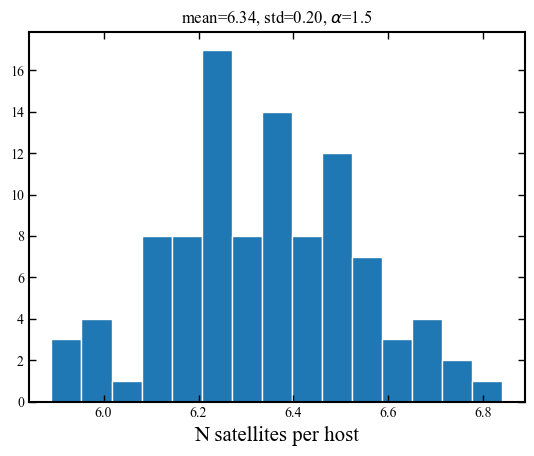

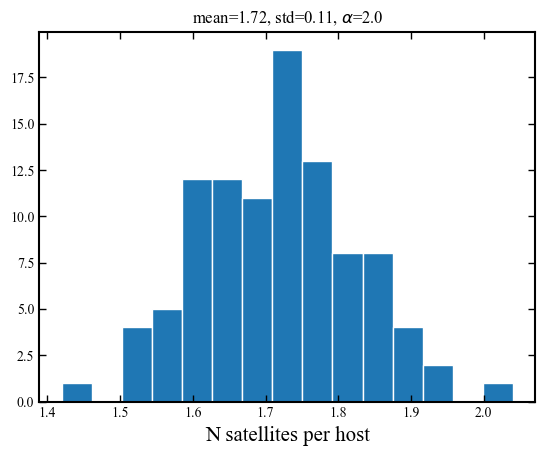

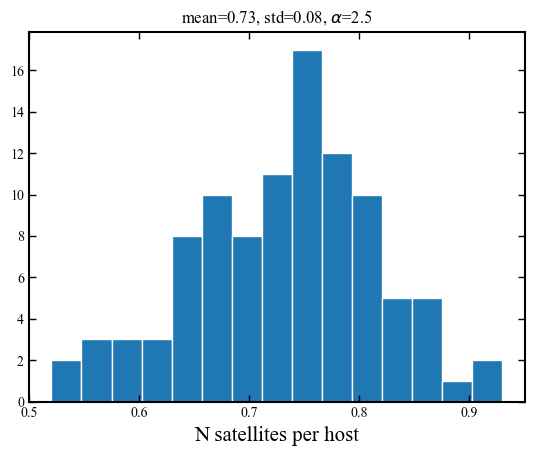

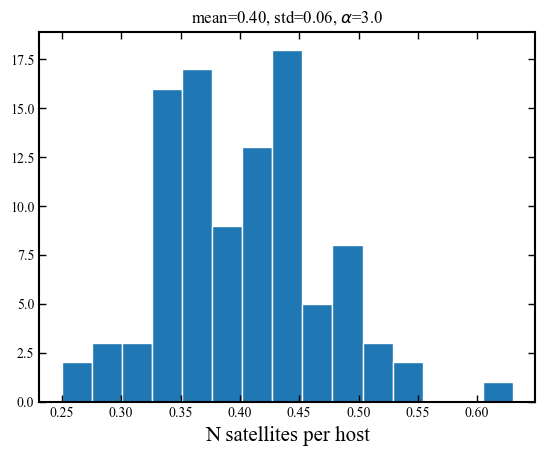

In [35]:
s0 = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"]

alpha_permutations = [1.5, 2.0, 2.5, 3.0]

empty = []
for index, alpha in enumerate(alpha_permutations):
    fid_theta = [10.5, alpha, 0.0, 0.0, 0.2, 0.0]
    s0_lgMs = np.apply_along_axis(jsm_SHMR.general_new, 0, fid_theta, s0, 0, 1)
    for SAGA_sample in s0_lgMs:
        stat = jsm_stats.SatStats_D(SAGA_sample, 7.5, 700)
        empty.append(stat.Nsat_tot)

Ntot = np.array(empty)
     
Ntot_alpha = np.array(np.split(Ntot, 4))

for i, sample in enumerate(Ntot_alpha):
    average = sample.mean()/100
    std = sample.std()/100
    plt.title(f"mean={average:.2f}, std={std:.2f}, $\\alpha$={alpha_permutations[i]}")
    plt.hist(sample/100, edgecolor="white", bins=15)
    plt.xlabel("N satellites per host")
    plt.show()

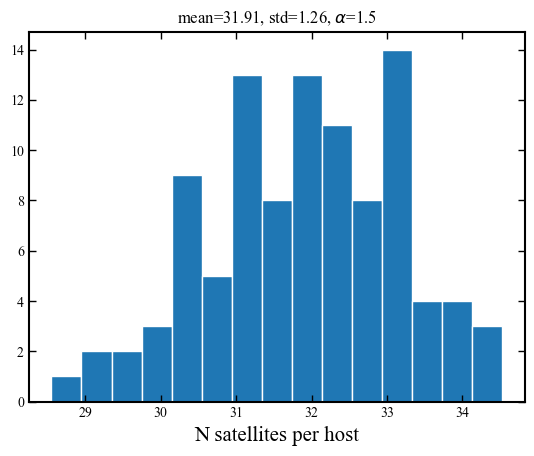

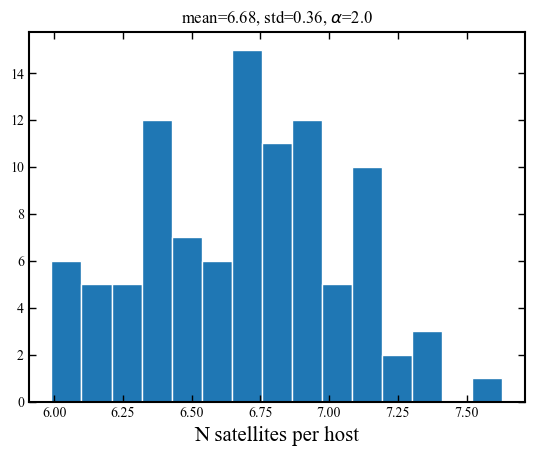

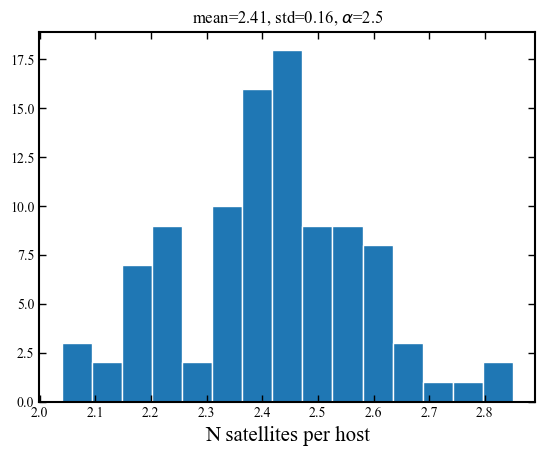

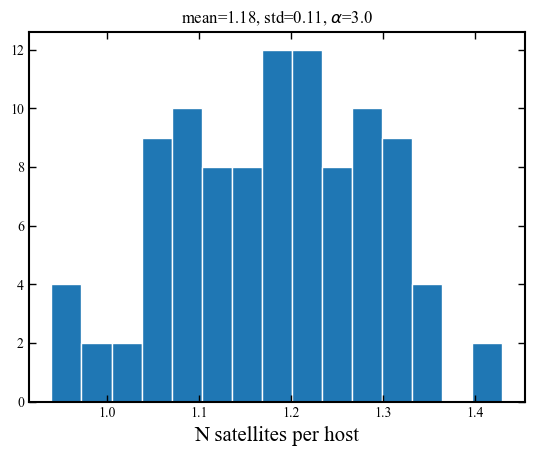

In [33]:
s15 = np.load("../../../data/cross_host/lognorm_015_psi3/models.npz")["mass"]

alpha_permutations = [1.5, 2.0, 2.5, 3.0]

empty = []
for index, alpha in enumerate(alpha_permutations):
    fid_theta = [10.5, alpha, 0.0, 0.0, 0.2, 0.0]
    s0_lgMs = np.apply_along_axis(jsm_SHMR.general_new, 0, fid_theta, s15, 0, 1)
    for SAGA_sample in s0_lgMs:
        stat = jsm_stats.SatStats_D(SAGA_sample, 6.5, 700)
        empty.append(stat.Nsat_tot)

Ntot = np.array(empty)
     
Ntot_alpha = np.array(np.split(Ntot, 4))

for i, sample in enumerate(Ntot_alpha):
    average = sample.mean()/100
    std = sample.std()/100
    plt.title(f"mean={average:.2f}, std={std:.2f}, $\\alpha$={alpha_permutations[i]}")
    plt.hist(sample/100, edgecolor="white", bins=15)
    plt.xlabel("N satellites per host")
    plt.show()

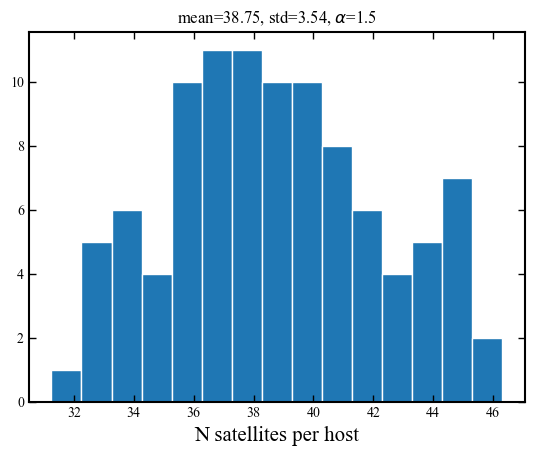

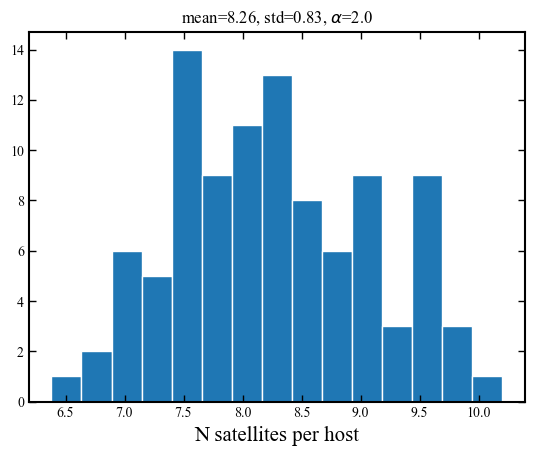

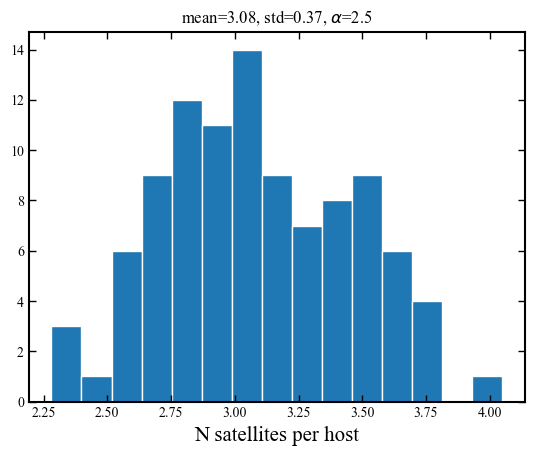

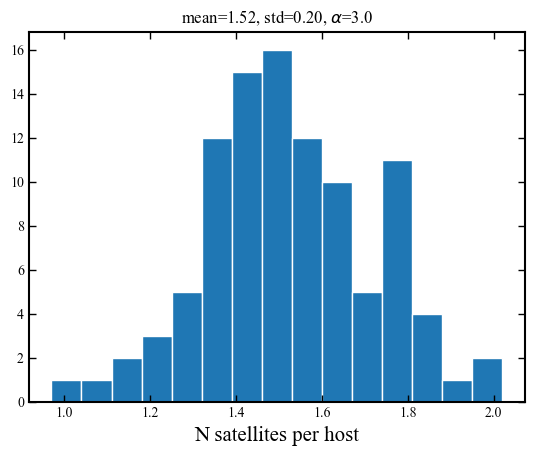

In [34]:
s30 = np.load("../../../data/cross_host/lognorm_030_psi3/models.npz")["mass"]

alpha_permutations = [1.5, 2.0, 2.5, 3.0]

empty = []
for index, alpha in enumerate(alpha_permutations):
    fid_theta = [10.5, alpha, 0.0, 0.0, 0.2, 0.0]
    s0_lgMs = np.apply_along_axis(jsm_SHMR.general_new, 0, fid_theta, s30, 0, 1)
    for SAGA_sample in s0_lgMs:
        stat = jsm_stats.SatStats_D(SAGA_sample, 6.5, 700)
        empty.append(stat.Nsat_tot)

Ntot = np.array(empty)
     
Ntot_alpha = np.array(np.split(Ntot, 4))

for i, sample in enumerate(Ntot_alpha):
    average = sample.mean()/100
    std = sample.std()/100
    plt.title(f"mean={average:.2f}, std={std:.2f}, $\\alpha$={alpha_permutations[i]}")
    plt.hist(sample/100, edgecolor="white", bins=15)
    plt.xlabel("N satellites per host")
    plt.show()